# Customer Behaviour Analysis in E-Commerce



## Load libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib.gridspec import GridSpec

In [ ]:
!pip install pandas

## Load Data

In [ ]:
# read in the data (downloaded from Kaggle)
cb_df = pd.read_csv("/content/data1.csv", delimiter=';')

# print the first 5 rows
cb_df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


## EDA



In [ ]:
# Check column names
cb_df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [ ]:
# Rename columns nmaes
cb_df.columns = cb_df.columns.str.replace(' ', '_')

cb_df.columns

Index(['account_length', 'location_code', 'user_id', 'credit_card_info_save',
       'push_status', 'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
# check the column types and some basic information of the data with the .info() function
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account_length                       3333 non-null   int64 
 1   location_code                        3333 non-null   int64 
 2   user_id                              3333 non-null   int64 
 3   credit_card_info_save                3333 non-null   object
 4   push_status                          3333 non-null   object
 5   add_to_wishlist                      3333 non-null   int64 
 6   desktop_sessions                     3333 non-null   int64 
 7   app_sessions                         3333 non-null   int64 
 8   desktop_transactions                 3333 non-null   int64 
 9   total_product_detail_views           3333 non-null   int64 
 10  session_duration                     3333 non-null   int64 
 11  promotion_clicks                     3333 n

In [ ]:
# change the data-type of the 4 columns to float
cb_df['avg_order_value'] = cb_df['avg_order_value'].replace(',','.', regex=True).astype(float)
cb_df['discount_rate_per_visited_products'] = cb_df['discount_rate_per_visited_products'].replace(',','.', regex=True).astype(float)
cb_df['add_to_cart_per_session'] = cb_df['add_to_cart_per_session'].replace(',','.', regex=True).astype(float)
cb_df['product_detail_view_per_app_session'] = cb_df['product_detail_view_per_app_session'].replace(',','.', regex=True).astype(float)

cb_df.dtypes

account_length                           int64
location_code                            int64
user_id                                  int64
credit_card_info_save                   object
push_status                             object
add_to_wishlist                          int64
desktop_sessions                         int64
app_sessions                             int64
desktop_transactions                     int64
total_product_detail_views               int64
session_duration                         int64
promotion_clicks                         int64
avg_order_value                        float64
sale_product_views                       int64
discount_rate_per_visited_products     float64
product_detail_view_per_app_session    float64
app_transactions                         int64
add_to_cart_per_session                float64
customer_service_calls                   int64
churn                                    int64
dtype: object

## Statistical Analysis

There are no missing values in our data (see .info() results) so we can move on and check our descriptive statistics with the .describe() function.

In [ ]:
# descriptive statistics for numeric columns after the conversion
cb_df.describe()

,account_length,location_code,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [ ]:
# descriptive statistics for non-numeric columns (after the conversion)
cb_df.describe(exclude= np.number)

,credit_card_info_save,push_status
count,3333,3333
unique,2,2
top,no,no
freq,3010,2411


## Handle Missing Values


In [ ]:
# Check missing values and sort data by descending order
cb_df.isnull().sum().sort_values(ascending=False)

account_length                         0
location_code                          0
customer_service_calls                 0
add_to_cart_per_session                0
app_transactions                       0
product_detail_view_per_app_session    0
discount_rate_per_visited_products     0
sale_product_views                     0
avg_order_value                        0
promotion_clicks                       0
session_duration                       0
total_product_detail_views             0
desktop_transactions                   0
app_sessions                           0
desktop_sessions                       0
add_to_wishlist                        0
push_status                            0
credit_card_info_save                  0
user_id                                0
churn                                  0
dtype: int64

<Axes: >

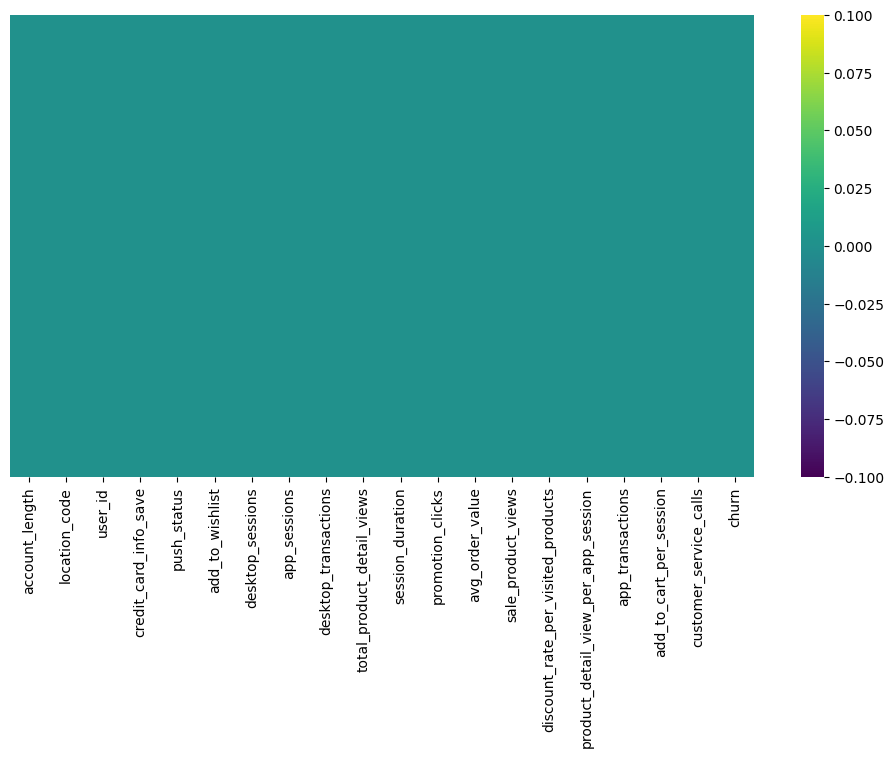

In [ ]:
# Check for missing values is to visualize it via HeatMap
plt.figure(figsize=(12,6))
sns.heatmap(cb_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

## Check for duplicates


In [ ]:
## If we find duplicated user ids we'll have to understand if there is a reason for appearing more than once in the data
cb_df.user_id.nunique()

3333

## Search for outliers

I:nterquartiles with the rules below:
    - outlier < Q1 - 1.5(IQR)
    - outlier > Q3 + 1.5(IQR)

In [ ]:
# Histogram of account length
acl_fig = px.histogram(cb_df, x="account_length")
acl_fig.show()

## Data is distributed normally, with some extreme outliers above 230 (depending on your point of view, maybe everything above 200)


In [ ]:
# Box plot of account length
acl_bx_fig = px.box(cb_df, y='account_length')

acl_bx_fig.show()

## The box plot makes it a bit clearer, here we can argue that everything above 208 length is an outlier

### Repeat with the rest of the variables


In [ ]:
# Histogram of add to wish-list
atw_fig = px.histogram(cb_df, x="add_to_wishlist")
atw_fig.show()

## Majority are 0.

In [ ]:
# Box plot of add to wish list
atw_bx_fig = px.box(cb_df, y='add_to_wishlist')

atw_bx_fig.show()

## From the box plot we can see that 51 is the largest outlier
## Since there are so many observations with 0s, 0 is not considered an outlier

In [ ]:
# Histogram of desktop sessions
ds_fig = px.histogram(cb_df, x="desktop_sessions")
ds_fig.show()

## We see the outliers we identified for values over 300, but sessions below 29 could be as well

In [ ]:
# Box plot of desktop sessions
ds_bx_fig = px.box(cb_df, y='desktop_sessions')

ds_bx_fig.show()

## The box plot suggests that anything above 325, and anything below 35 is an outlier.

In [ ]:
# Histogram of sessions duration
sd_fig = px.histogram(cb_df, x="session_duration")
sd_fig.show()

In [ ]:
# Box plot of session duration
sd_bx_fig = px.box(cb_df, y='session_duration')

sd_bx_fig.show()

## Anything above 340 and anything below 64 seems to be an outlier.


In [ ]:
# Histogram of promotion clicks
pc_fig = px.histogram(cb_df, x="promotion_clicks")
pc_fig.show()

In [ ]:
# Box plot of promotion clicks
pc_bx_fig = px.box(cb_df, y='promotion_clicks')

pc_bx_fig.show()

## The box plot indicates that anything above 155 and any data point below 46 is an outlier

In [ ]:
# Histogram of average order value
aov_fig = px.histogram(cb_df, x="avg_order_value")
aov_fig.show()

In [ ]:
# Box plot of Average order value
aov_bx_fig = px.box(cb_df, y='avg_order_value')

aov_bx_fig.show()

## The box plot indicates that anything above 342.8 and below 64.2 could be consider an outlier

In [ ]:
# Histogram of sale product views
spv_fig = px.histogram(cb_df, x="sale_product_views")
spv_fig.show()

In [ ]:
# Box plot of sale product views
spv_bx_fig = px.box(cb_df, y='sale_product_views')

spv_bx_fig.show()

## The box plot indicates that more than 153 and below 46 sale product views can be consider to be outliers

In [ ]:
# Histogram of discount rate per visited products
drpvp_fig = px.histogram(cb_df, x="discount_rate_per_visited_products")
drpvp_fig.show()

In [ ]:
# Box plot of discount rate per visited products
drpvp_bx_fig = px.box(cb_df, y='discount_rate_per_visited_products')

drpvp_bx_fig.show()

## Discounts above 15% and below 2.89% could be considered to be outliers

In [ ]:
# Histogram of product detail view per app session
pdvpas_fig = px.histogram(cb_df, x="product_detail_view_per_app_session")
pdvpas_fig.show()

In [ ]:
# Box plot of product detail view per app session
pdvpas_bx_fig = px.box(cb_df, y='product_detail_view_per_app_session')

pdvpas_bx_fig.show()

## The box plot suggests that above 17.6 and below 2.9 sessions could be considered outliers

In [ ]:
# Histogram of app transactions
at_fig = px.histogram(cb_df, x="app_transactions")
at_fig.show()

## app transactions are skewed towards 0 but with a somewhat normal distribution
## looks like above 9 transactions could be consider an outlier

In [ ]:
# Box plot of app transactions
at_bx_fig = px.box(cb_df, y='app_transactions')

at_bx_fig.show()

## per box plot anything from 11 and above could be considered an outlier

In [ ]:
# Histogram of add to cart per session
atcps_fig = px.histogram(cb_df, x="add_to_cart_per_session")
atcps_fig.show()

## data follows a normal distribution which is interesting

In [ ]:
# Box plot of add to cart per session
atcps_bx_fig = px.box(cb_df, y='add_to_cart_per_session')

atcps_bx_fig.show()

## The box plot suggests that anything above 4.73 and below 0.84 could be considered an outlier

In [ ]:
# Histogram of customer service calls
csc_fig = px.histogram(cb_df, x="customer_service_calls")
csc_fig.show()

## as we expected, data is skewed towards 0 with anythhing above 5 being a potential outlier

In [ ]:
# Box plot of customer service calls
csc_bx_fig = px.box(cb_df, y='customer_service_calls')

csc_bx_fig.show()

## box plot suggests anything above 4 could be considered an oulier

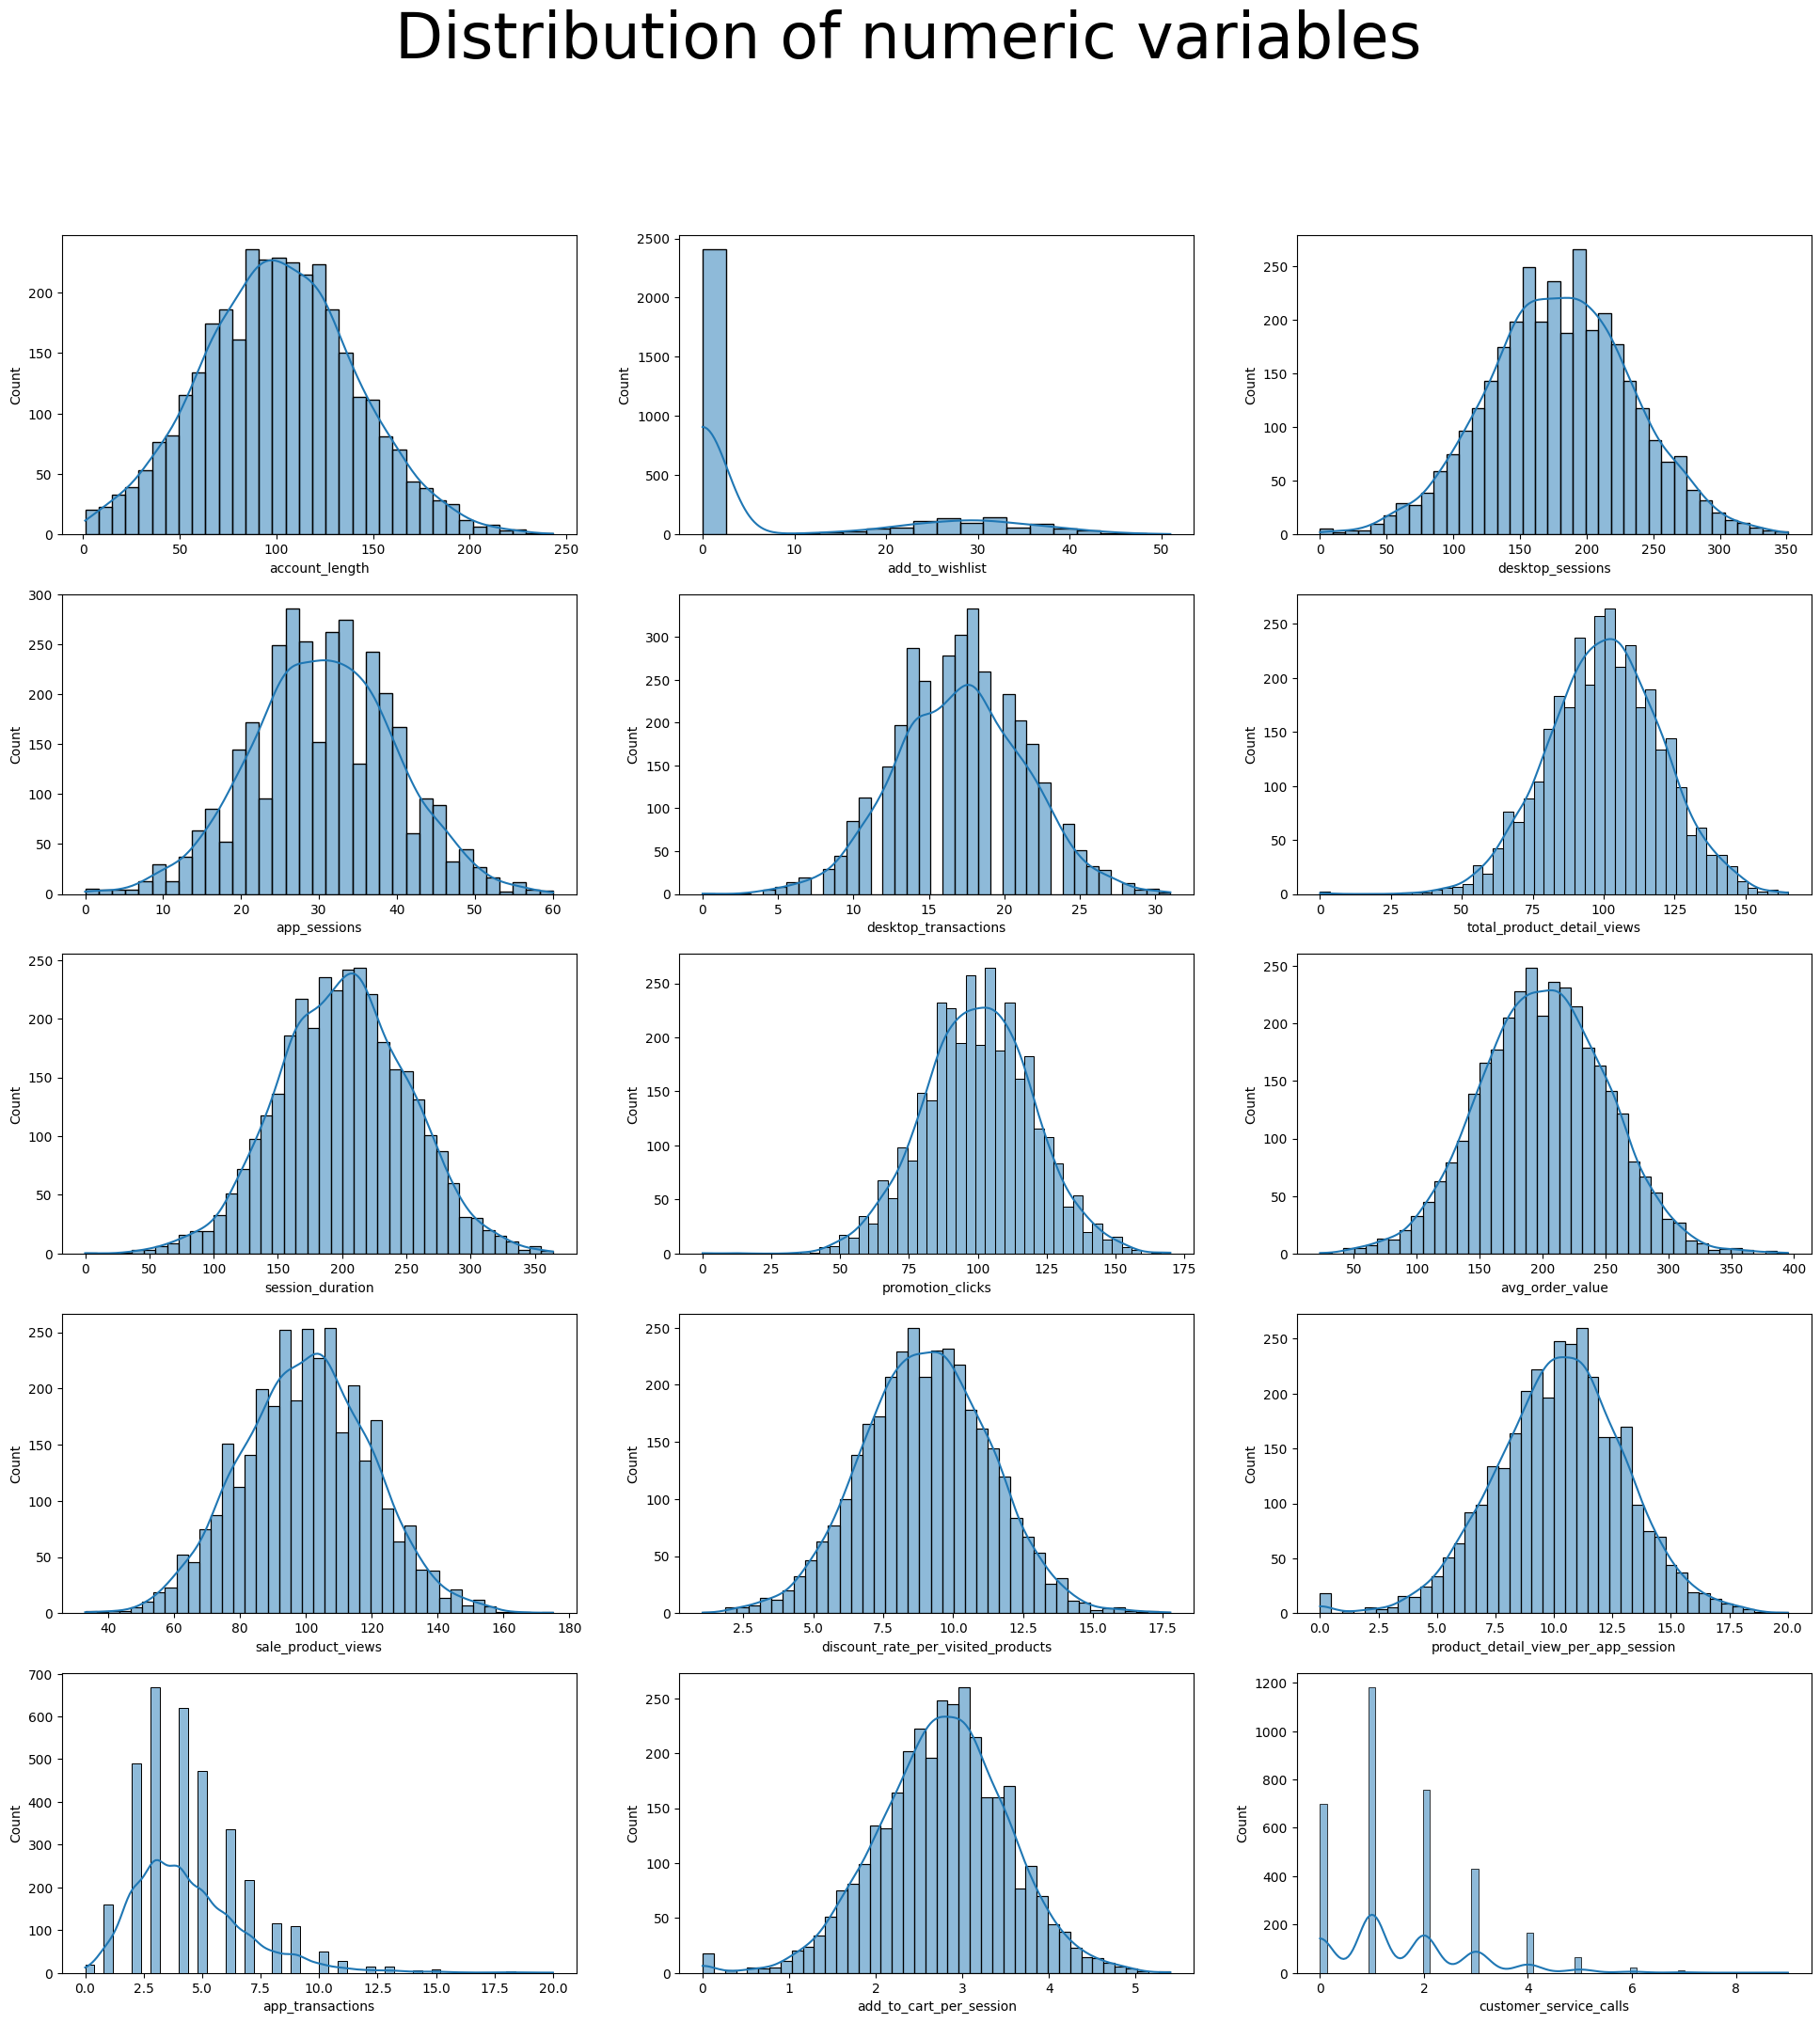

In [ ]:
# An alternative way to plot the distribution of all numeric variables in one go is the below

## Create a list of the numeric variables
numeric_columns = ['account_length', 'add_to_wishlist', 'desktop_sessions','app_sessions', 'desktop_transactions',
                   'total_product_detail_views','session_duration', 'promotion_clicks', 'avg_order_value','sale_product_views',
                   'discount_rate_per_visited_products','product_detail_view_per_app_session', 'app_transactions',
                   'add_to_cart_per_session', 'customer_service_calls']

fig, axes = plt.subplots(5,3, figsize=(24,24))
fig.suptitle("Distribution of numeric variables", size=48)

for i in range(5):
    for j in range(3):
        sns.histplot(cb_df[numeric_columns[3*i+j]], ax=axes[i,j], kde=True)

### Conclusions based on the visualisations

- All of the numerical variables in the dataset has outliers from a statistical point of view. What is apparent is that all of the outliers represent natural variations as in e-commerce we expect such variations, making the outliers **"True outliers"**.
- If we had Outliers that we believe them to be data errors we could always use techniques such as removing all data points that are < Q1 - 1.5(IQR) and > Q3 +1.5(IQR) or removing data points that are 3 standard deviations below or above mean

In [ ]:
# Example code for removing outliers based on 3 standard deviations below and above mean

## Create an example dataframe by copying our dataframe
ex_df = cb_df.copy()

## Create a list with the numeric columns
numeric_columns = ['account_length', 'add_to_wishlist', 'desktop_sessions','app_sessions', 'desktop_transactions',
                   'total_product_detail_views','session_duration', 'promotion_clicks', 'avg_order_value','sale_product_views',
                   'discount_rate_per_visited_products','product_detail_view_per_app_session', 'app_transactions',
                   'add_to_cart_per_session', 'customer_service_calls']

## Create the outliers list for each numeric column
outliers = []
for i in numeric_columns:
    outliers.extend(ex_df[(ex_df[i] < ex_df[i].mean() - 3*ex_df[i].std()) | (ex_df[i] > ex_df[i].mean() + 3*ex_df[i].std())].index)

## drop the outliers from the example dataframe
ex_df.drop(set(outliers),inplace = True)

In [ ]:
# compare the example dataframe and the dataframe that includes the true outliers
print(F"The number of observations with the True outliers is {len(cb_df.index)} and the number of observations without the True outliers is {len(ex_df.index)}. \nThis is {len(cb_df.index) - len(ex_df.index)} rows difference.")

The number of observations with the True outliers is 3333 and the number of observations without the True outliers is 3168. 
This is 165 rows difference.


## Analysis of the Dependent variable (Churn) vs Idependent variables



In [ ]:
cb_df.churn.dtype

dtype('int64')

In [ ]:

cb_df['churn'] = cb_df['churn'].astype('int')

NameError: ignored

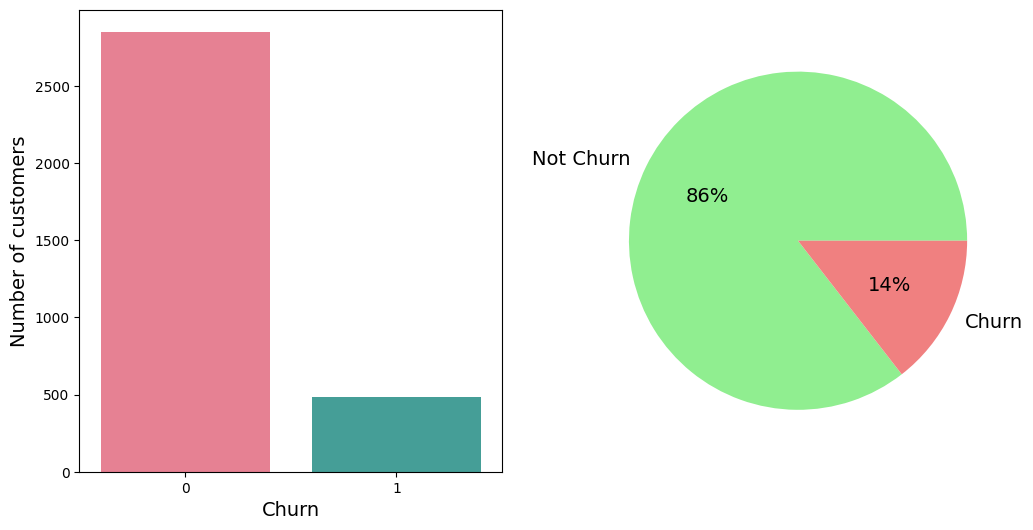

In [ ]:
# define subplots
fig, ax = plt.subplots(1,2,figsize= (12,6))

# create the pie plot for the percentage opf churn and not churn customers
plt.pie(cb_df.churn.value_counts(),labels = ["Not Churn", "Churn"], colors = ["lightgreen", "lightcoral"], autopct='%.0f%%', textprops={'fontsize': 14})

# create a bar plot counting the number of customers that are churn 0 and churn 1
cp = sns.countplot(x=cb_df['churn'], ax = ax[0], palette = 'husl')

cp.set_xlabel("Churn", fontsize=14)

cp.set_ylabel("Number of customers", fontsize=14)

plt.show()

### Plot Churn against the categorical data

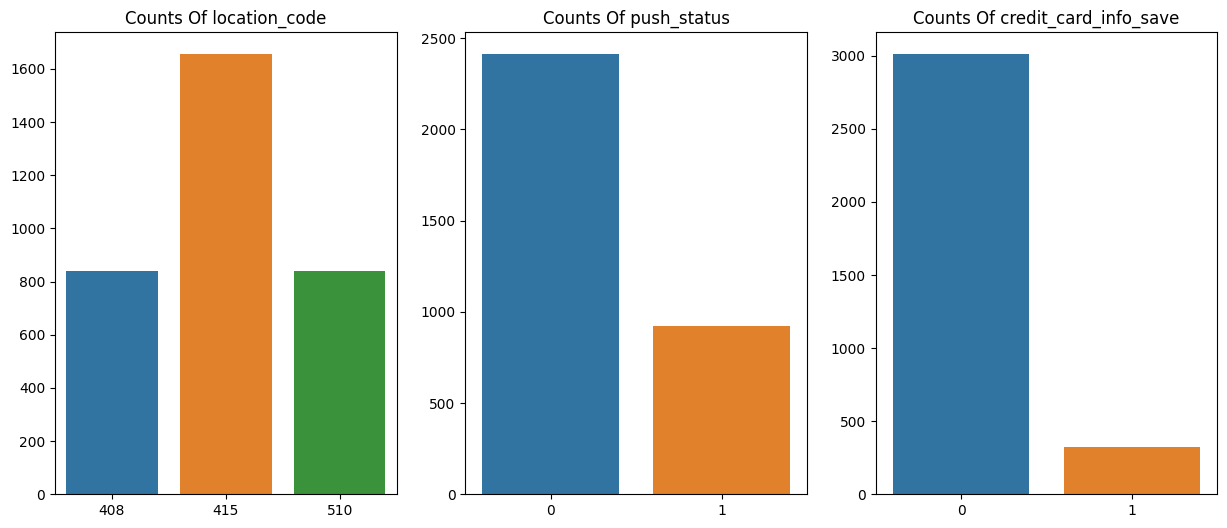

In [ ]:
# Define categorical columns
categorical_columns = ["location_code","push_status","credit_card_info_save"]

# transform push status and credit card info to binary format for analysis
for i in cb_df.select_dtypes(include = ['object']).columns.values:
    cb_df[i] = cb_df[i].replace(["yes", "no"],[1, 0])

fig, ax = plt.subplots(1, len(categorical_columns), figsize = (15, 6))
for i, a in zip(categorical_columns, ax):
    temp = cb_df[i].value_counts()
    a.set_title("Counts Of " + str(i))
    sns.barplot(ax = a, x=temp.index, y=temp.values)
plt.show()

#### Observations from the categorical columns plots

- Majority of customers are in location code 415
- Majority of customers don't allow push notifications
- Majority of customers don't store their credit card information on the side

### Plot categorical data against the Churn

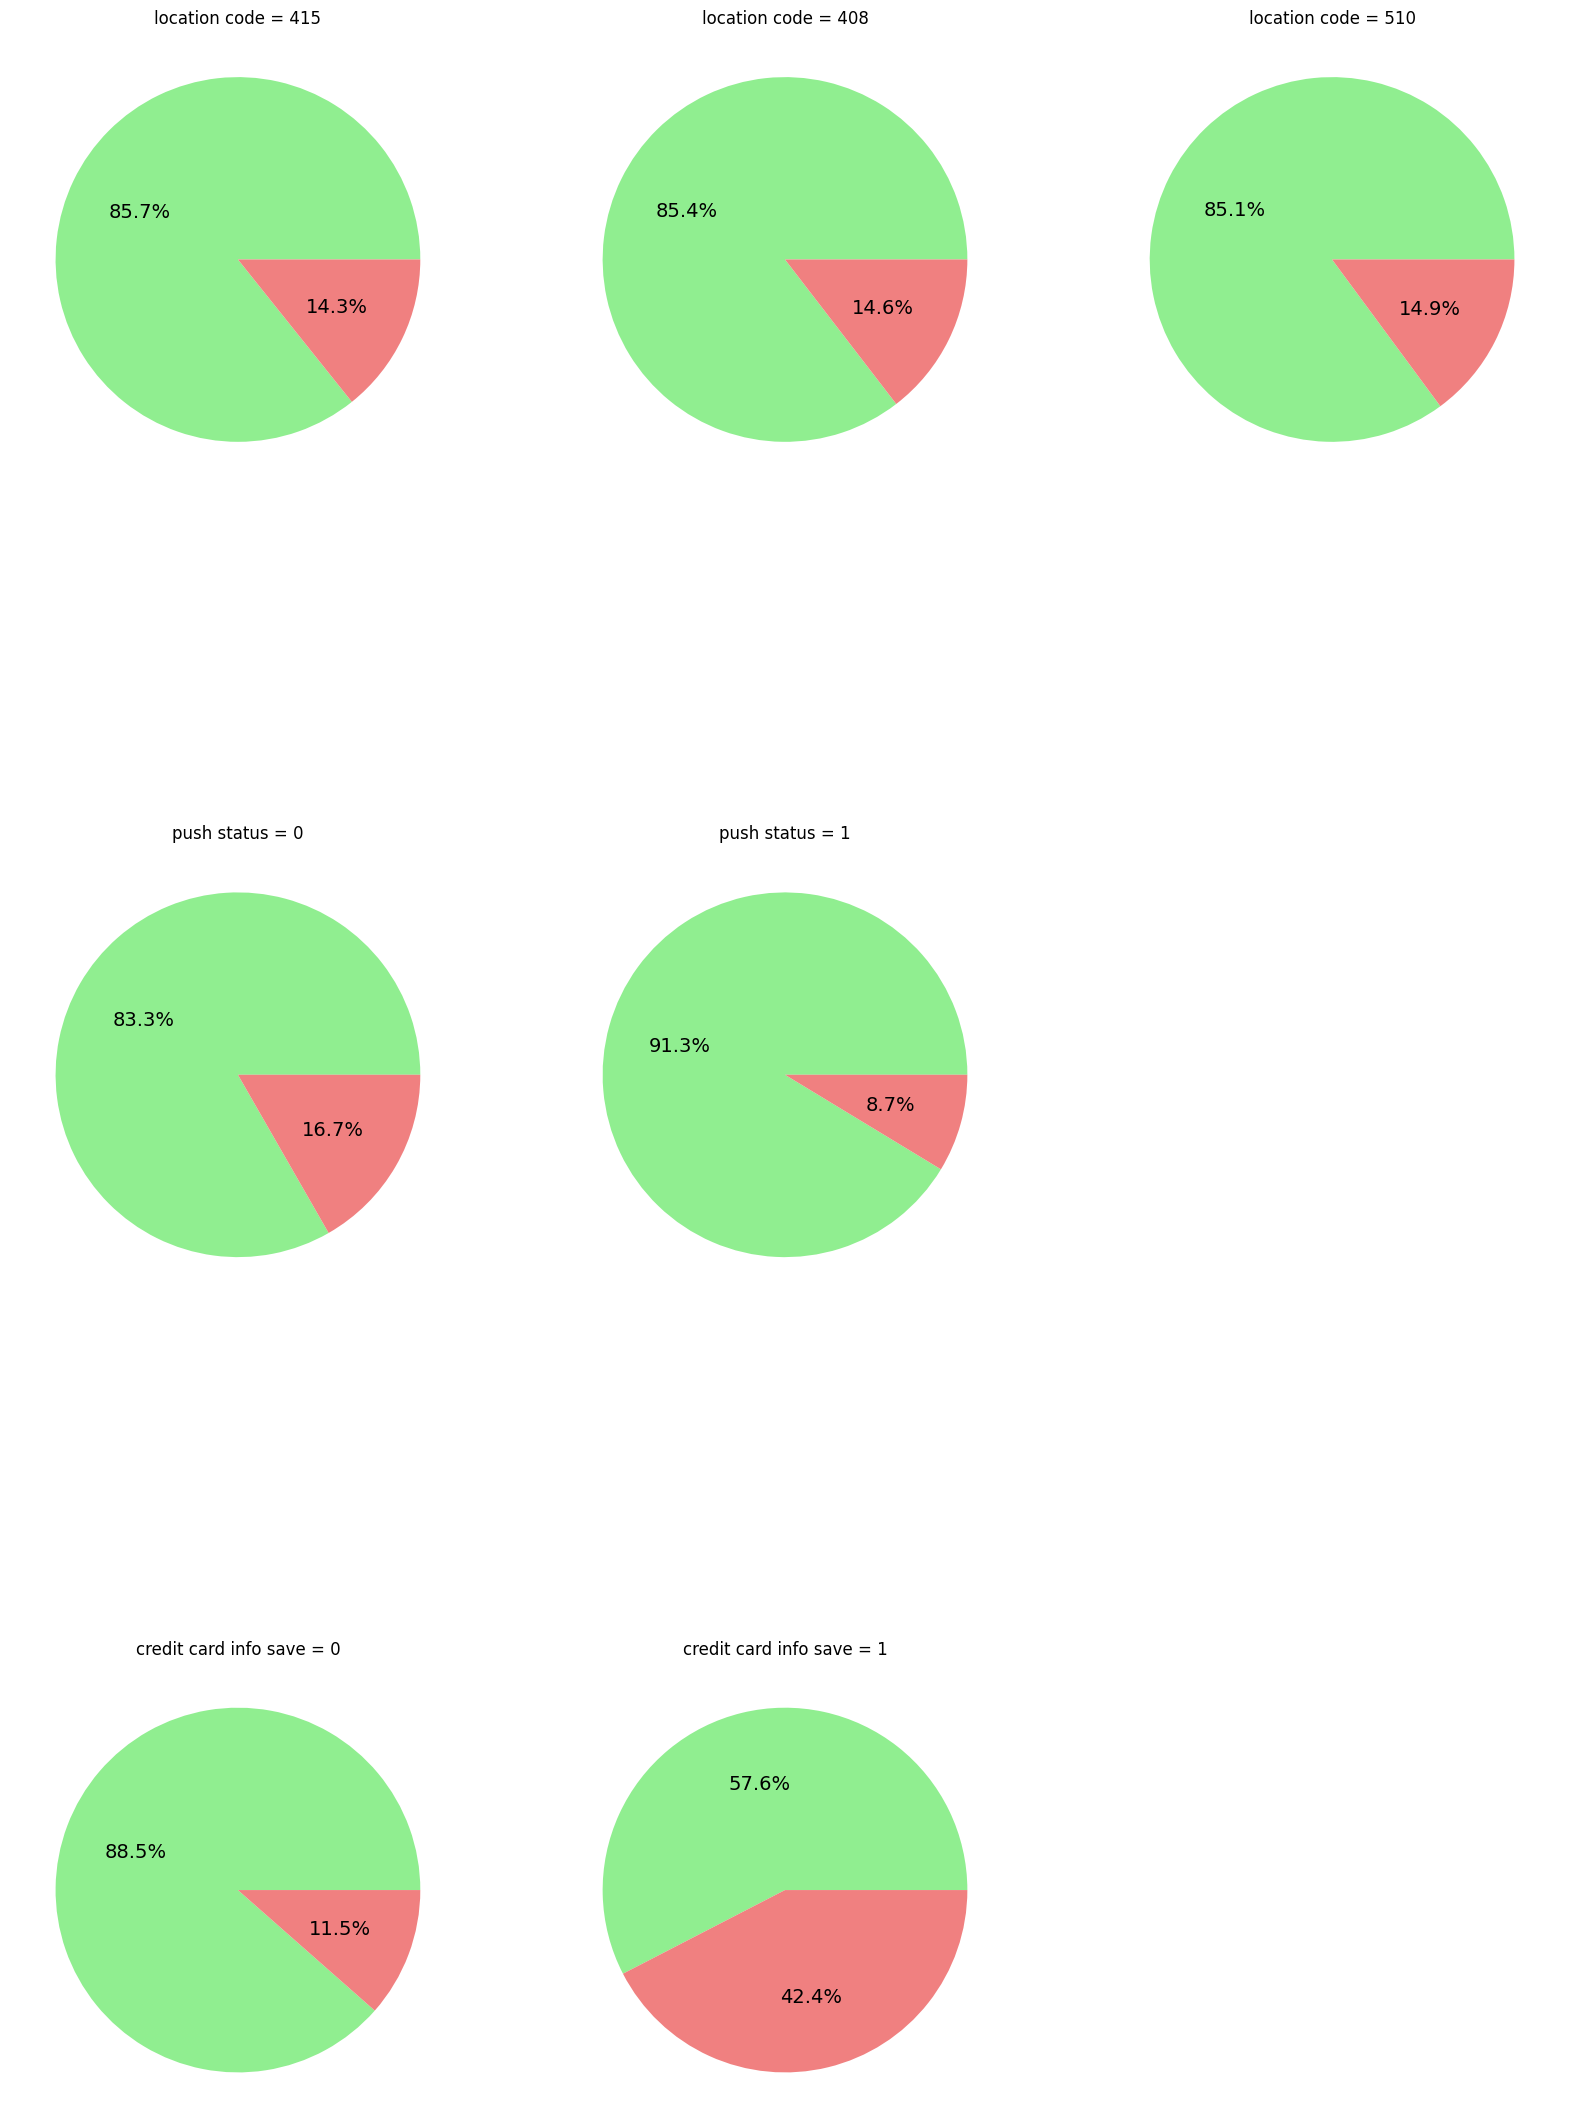

In [ ]:
plt.figure(1, figsize=(20,30))
the_grid = GridSpec(3, 3)

plt.subplot(the_grid[0, 0], aspect=1, title='location code = 415')
source_pie = plt.pie(cb_df[cb_df[categorical_columns[0]] == cb_df[categorical_columns[0]].unique()[0]].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 1], aspect=1, title='location code = 408')
source_pie = plt.pie(cb_df[cb_df[categorical_columns[0]] == cb_df[categorical_columns[0]].unique()[1]].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 2], aspect=1, title='location code = 510')
source_pie = plt.pie(cb_df[cb_df[categorical_columns[0]] == cb_df[categorical_columns[0]].unique()[2]].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[1, 0], aspect=1, title='push status = 0')
source_pie = plt.pie(cb_df[cb_df[categorical_columns[1]] == 0].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[1, 1], aspect=1, title='push status = 1')
source_pie = plt.pie(cb_df[cb_df[categorical_columns[1]] == 1].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[2, 0], aspect=1, title='credit card info save = 0')
source_pie = plt.pie(cb_df[cb_df[categorical_columns[2]] == 0].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[2, 1], aspect=1, title='credit card info save = 1')
source_pie = plt.pie(cb_df[cb_df[categorical_columns[2]] == 1].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})


plt.show()

#### Observations from plotting categorical data against Churn

- The location codes have a similar percentage of churns, meaning that location might not be a strong indication for churn
- Customers with push status activated are less likely to be churns, meaning that motivating customers to activate push status might help minimize churns
- Customers with their credit card information saved on the side are far less likely to be churns than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns.
    - This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.

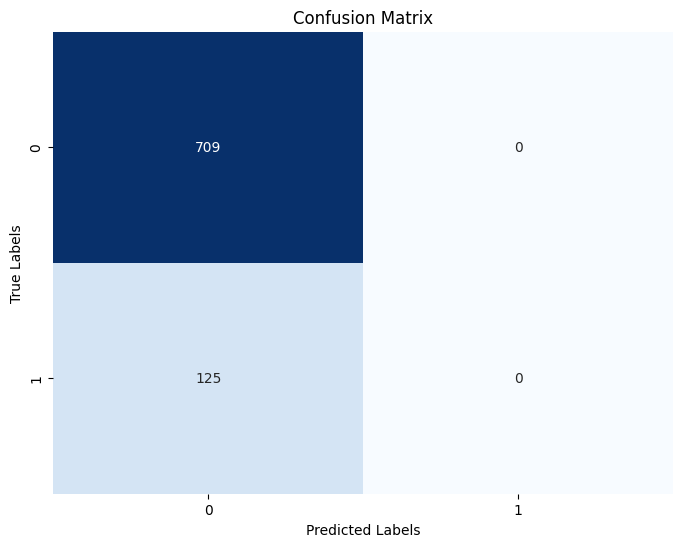

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming cb_df has been preprocessed and split into features and target (X and y)
X = cb_df.drop(columns=['churn'])  # Features
y = cb_df['churn']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the classifier (for example, Logistic Regression)
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


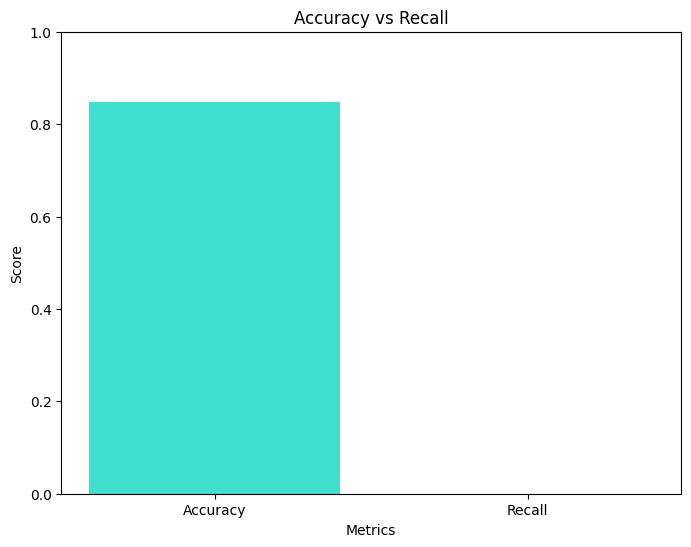

In [ ]:
from sklearn.metrics import accuracy_score, recall_score

# Calculate Accuracy and Recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Plotting the Accuracy vs Recall
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy', 'Recall'], [accuracy, recall], color=['turquoise', 'green'])
plt.title('Accuracy vs Recall')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1 as scores range between 0 and 1
plt.show()
